# Historical Data vs Reality: When Past Patterns Don't Continue

This notebook demonstrates a critical risk in using historical data for model parameters: **historical patterns may not continue into the future**.

Understanding this is essential because:
- Historical averages describe the past, not predict the future
- Models using historical averages assume patterns will continue
- When reality doesn't match the average, model recommendations fail
- Variation around averages is hidden but important


## Key Concepts

**Historical Data** provides parameters:
- Past performance data becomes assumptions about future performance
- Averages, patterns, and trends from history inform model parameters
- This is natural and common, but risky

**The Problem**: Historical patterns may not continue:
- Market conditions change
- Competition evolves
- Technology advances
- Operations improve
- What worked in the past may not work in the future

**Averages Hide Variation**:
- An average of 100 units doesn't mean every period has 100 units
- Reality has variation: some periods 80, some 120
- Models using averages assume reality matches the average
- When actual values differ, recommendations fail

**Critical insight**: Historical data is a starting point, not a guarantee. Always consider whether patterns will continue.


## Scenario: Inventory Ordering Decision

You manage inventory for a retail store. You need to decide how many units of Product X to order each month.

**Historical data shows:**
- Sales over the past 12 months: 80, 95, 110, 100, 105, 90, 120, 85, 115, 100, 95, 110
- Average monthly sales: 100 units

**The model uses this average as a parameter** to recommend ordering 500 units (5-month supply).

**But what if reality doesn't match the average?** What if sales are higher or lower than expected?


## Step 1: Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


## Step 2: Historical Data and Average

Let's look at the historical sales data and calculate the average:


HISTORICAL SALES DATA:
  Data: [80, 95, 110, 100, 105, 90, 120, 85, 115, 100, 95, 110]
  Average: 100.4 units/month
  Standard Deviation: 11.6 units
  Range: 80 to 120 units

The model uses 100 units/month as the demand parameter.


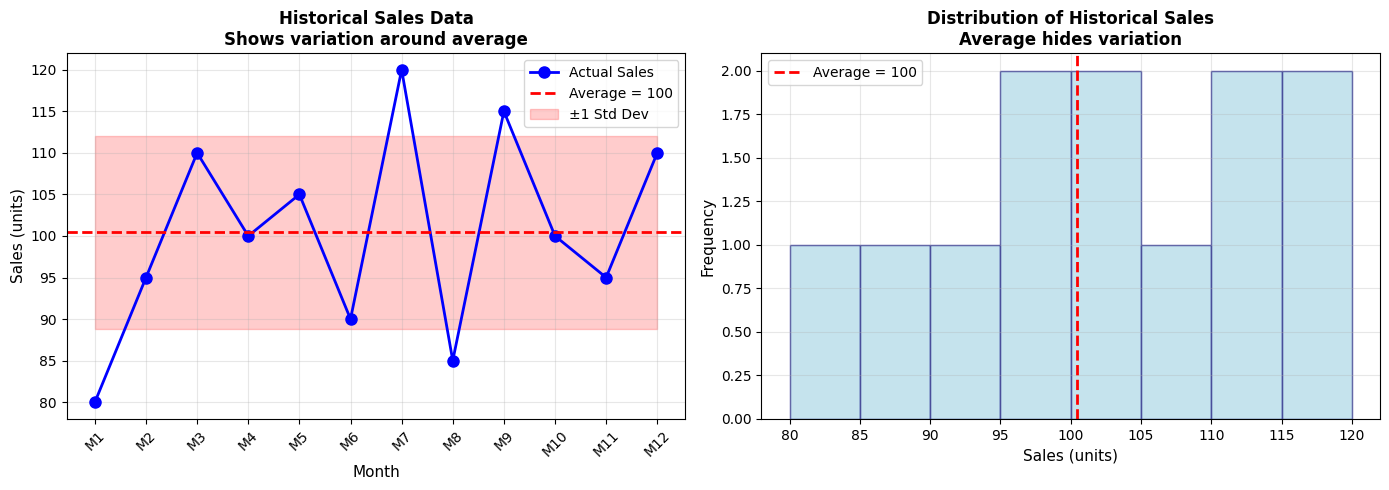


KEY OBSERVATION:
  - Average is 100, but actual sales vary from 80 to 120
  - The average doesn't tell you about this variation!
  - Models using the average assume every month will have exactly 100 units


In [2]:
# Historical sales data (past 12 months)
historical_sales = [80, 95, 110, 100, 105, 90, 120, 85, 115, 100, 95, 110]
months = [f"Month {i+1}" for i in range(len(historical_sales))]

# Calculate average
average_sales = np.mean(historical_sales)
std_sales = np.std(historical_sales)

print("HISTORICAL SALES DATA:")
print(f"  Data: {historical_sales}")
print(f"  Average: {average_sales:.1f} units/month")
print(f"  Standard Deviation: {std_sales:.1f} units")
print(f"  Range: {min(historical_sales)} to {max(historical_sales)} units")
print(f"\nThe model uses {average_sales:.0f} units/month as the demand parameter.")

# Visualize historical data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Historical data with average line
ax1.plot(range(len(historical_sales)), historical_sales, 'o-', color='blue', 
         linewidth=2, markersize=8, label='Actual Sales')
ax1.axhline(y=average_sales, color='red', linestyle='--', linewidth=2, 
            label=f'Average = {average_sales:.0f}')
ax1.fill_between(range(len(historical_sales)), 
                 average_sales - std_sales, average_sales + std_sales, 
                 alpha=0.2, color='red', label='±1 Std Dev')
ax1.set_xlabel('Month', fontsize=11)
ax1.set_ylabel('Sales (units)', fontsize=11)
ax1.set_title('Historical Sales Data\nShows variation around average', 
              fontsize=12, fontweight='bold')
ax1.set_xticks(range(len(historical_sales)))
ax1.set_xticklabels([f"M{i+1}" for i in range(len(historical_sales))], rotation=45)
ax1.legend()
ax1.grid(alpha=0.3)

# Plot 2: Distribution
ax2.hist(historical_sales, bins=8, color='lightblue', edgecolor='navy', alpha=0.7)
ax2.axvline(x=average_sales, color='red', linestyle='--', linewidth=2, 
            label=f'Average = {average_sales:.0f}')
ax2.set_xlabel('Sales (units)', fontsize=11)
ax2.set_ylabel('Frequency', fontsize=11)
ax2.set_title('Distribution of Historical Sales\nAverage hides variation', 
              fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKEY OBSERVATION:")
print(f"  - Average is {average_sales:.0f}, but actual sales vary from {min(historical_sales)} to {max(historical_sales)}")
print("  - The average doesn't tell you about this variation!")
print("  - Models using the average assume every month will have exactly 100 units")


## Step 3: Model Using Historical Average

The model uses the historical average as the demand parameter and recommends ordering:


In [3]:
# Model recommendation using historical average
safety_stock_months = 5  # Order 5 months of supply
order_quantity = average_sales * safety_stock_months

print("MODEL RECOMMENDATION (Using Historical Average):")
print(f"  Demand parameter: {average_sales:.0f} units/month (from historical average)")
print(f"  Order quantity: {order_quantity:.0f} units ({safety_stock_months} months supply)")
print(f"  Assumption: Future sales will be exactly {average_sales:.0f} units/month")
print("\n⚠️  WARNING: This assumes reality will match the average!")


MODEL RECOMMENDATION (Using Historical Average):
  Demand parameter: 100 units/month (from historical average)
  Order quantity: 502 units (5 months supply)
  Assumption: Future sales will be exactly 100 units/month

⚠️  WARNING: This assumes reality will match the average!


## Step 4: What Happens When Reality Doesn't Match the Average?

Let's simulate what happens in future months when actual sales differ from the average:


In [4]:
# Simulate future months with different actual sales
# Scenario 1: Sales match average (unlikely in reality)
# Scenario 2: Sales are higher than average
# Scenario 3: Sales are lower than average
# Scenario 4: Sales vary (more realistic)

future_scenarios = {
    'Matches Average': [100, 100, 100, 100, 100],
    'Higher Sales': [120, 125, 115, 130, 120],
    'Lower Sales': [80, 75, 85, 70, 80],
    'Variable Sales': [110, 90, 120, 85, 115]
}

results = []

for scenario_name, future_sales in future_scenarios.items():
    total_sales = sum(future_sales)
    inventory_remaining = order_quantity - total_sales
    
    # Calculate issues
    stockouts = sum(1 for s in future_sales if s > average_sales * 1.2)  # If sales > 20% above average
    overstock = inventory_remaining if inventory_remaining > 0 else 0
    
    results.append({
        'Scenario': scenario_name,
        'Avg Future Sales': np.mean(future_sales),
        'Total Sales': total_sales,
        'Inventory Remaining': inventory_remaining,
        'Stockout Risk': 'High' if stockouts > 0 else 'Low',
        'Overstock': overstock
    })

results_df = pd.DataFrame(results)
print("WHAT HAPPENS WHEN REALITY DOESN'T MATCH AVERAGE:\n")
print(results_df.to_string(index=False))

print("\n\nKEY INSIGHTS:")
print("  - Only 'Matches Average' scenario works perfectly (unlikely in reality)")
print("  - Higher sales → Stockouts (model underestimated demand)")
print("  - Lower sales → Overstock (model overestimated demand)")
print("  - Variable sales → Both problems occur")


WHAT HAPPENS WHEN REALITY DOESN'T MATCH AVERAGE:

       Scenario  Avg Future Sales  Total Sales  Inventory Remaining Stockout Risk  Overstock
Matches Average             100.0          500             2.083333           Low   2.083333
   Higher Sales             122.0          610          -107.916667          High   0.000000
    Lower Sales              78.0          390           112.083333           Low 112.083333
 Variable Sales             104.0          520           -17.916667           Low   0.000000


KEY INSIGHTS:
  - Only 'Matches Average' scenario works perfectly (unlikely in reality)
  - Higher sales → Stockouts (model underestimated demand)
  - Lower sales → Overstock (model overestimated demand)
  - Variable sales → Both problems occur


## Step 5: Visualize the Problem

Let's visualize how using the average can lead to problems:


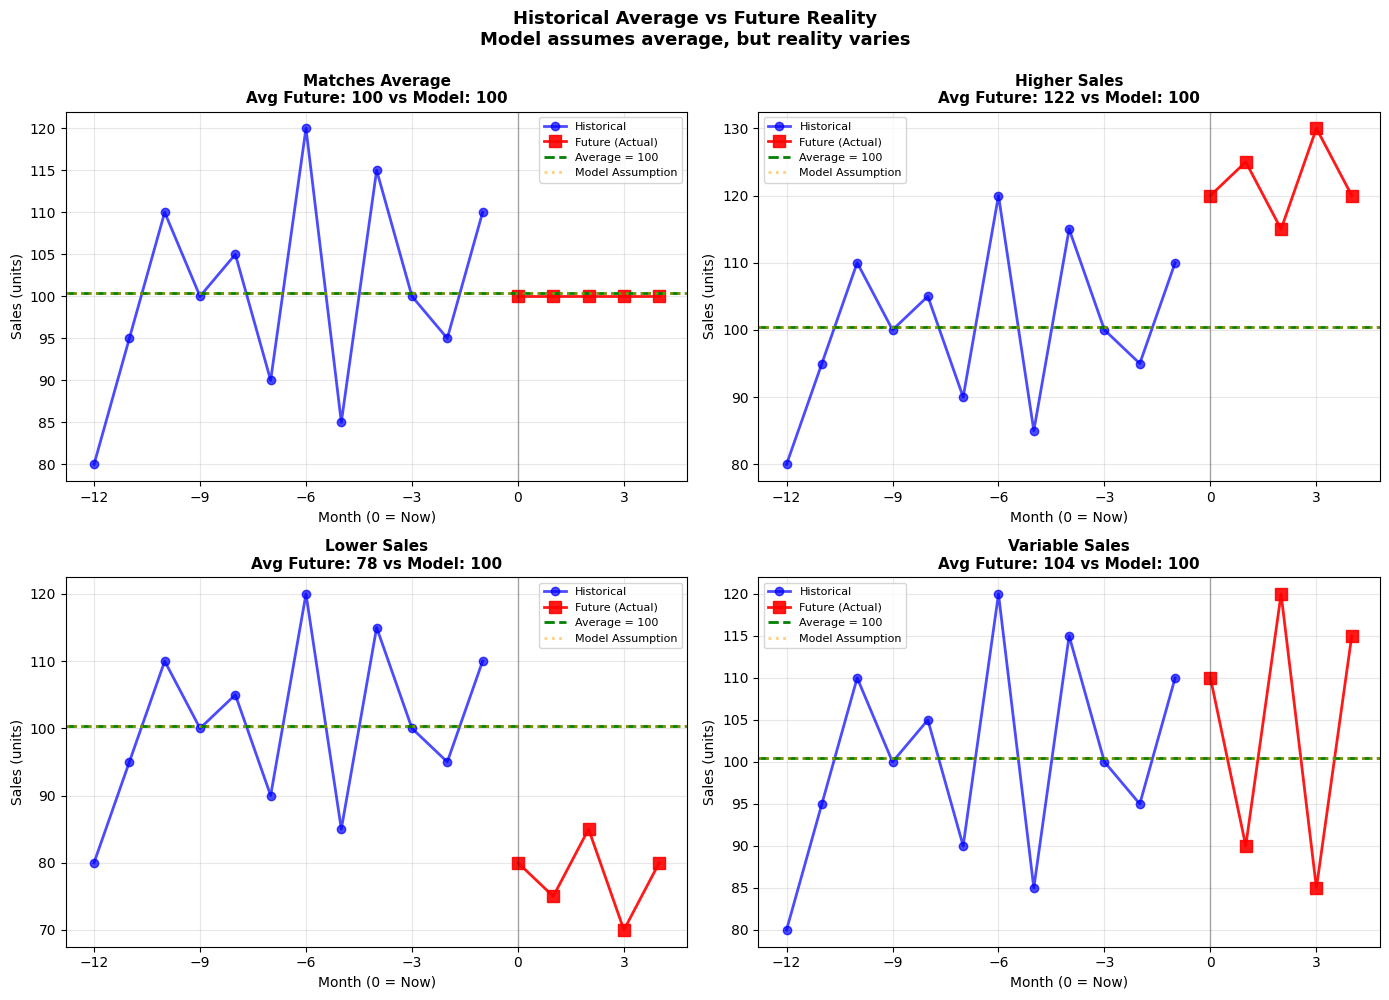


OBSERVATION:
  - Model uses historical average (green dashed line)
  - Future reality (red squares) often differs from average
  - This mismatch causes stockouts or overstock!


In [5]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

scenario_idx = 0
for scenario_name, future_sales in future_scenarios.items():
    ax = axes[scenario_idx // 2, scenario_idx % 2]
    
    # Plot historical + future
    all_months = list(range(-12, 0)) + list(range(0, 5))
    all_sales = historical_sales + future_sales
    
    # Historical data
    ax.plot(range(-12, 0), historical_sales, 'o-', color='blue', 
            linewidth=2, markersize=6, label='Historical', alpha=0.7)
    
    # Future data
    ax.plot(range(0, 5), future_sales, 's-', color='red', 
            linewidth=2, markersize=8, label='Future (Actual)', alpha=0.9)
    
    # Average line
    ax.axhline(y=average_sales, color='green', linestyle='--', 
               linewidth=2, label=f'Average = {average_sales:.0f}')
    
    # Order quantity line
    ax.axhline(y=order_quantity/5, color='orange', linestyle=':', 
               linewidth=2, alpha=0.5, label='Model Assumption')
    
    # Vertical line separating past and future
    ax.axvline(x=0, color='black', linestyle='-', linewidth=1, alpha=0.3)
    
    ax.set_xlabel('Month (0 = Now)', fontsize=10)
    ax.set_ylabel('Sales (units)', fontsize=10)
    ax.set_title(f'{scenario_name}\nAvg Future: {np.mean(future_sales):.0f} vs Model: {average_sales:.0f}', 
                 fontsize=11, fontweight='bold')
    ax.legend(fontsize=8)
    ax.grid(alpha=0.3)
    ax.set_xticks(range(-12, 5, 3))
    
    scenario_idx += 1

plt.suptitle('Historical Average vs Future Reality\nModel assumes average, but reality varies', 
             fontsize=13, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("\nOBSERVATION:")
print("  - Model uses historical average (green dashed line)")
print("  - Future reality (red squares) often differs from average")
print("  - This mismatch causes stockouts or overstock!")


SCENARIO: Market Conditions Changed
  Historical average: 100 units/month
  New reality (competitor opened): 70 units/month
  Change: -30% decrease

MODEL RECOMMENDATION (using historical average):
  Order: 502 units

ACTUAL NEED (new reality):
  Need: 350 units

PROBLEM:
  Overstock: 152 units
  Estimated holding cost: $1,521


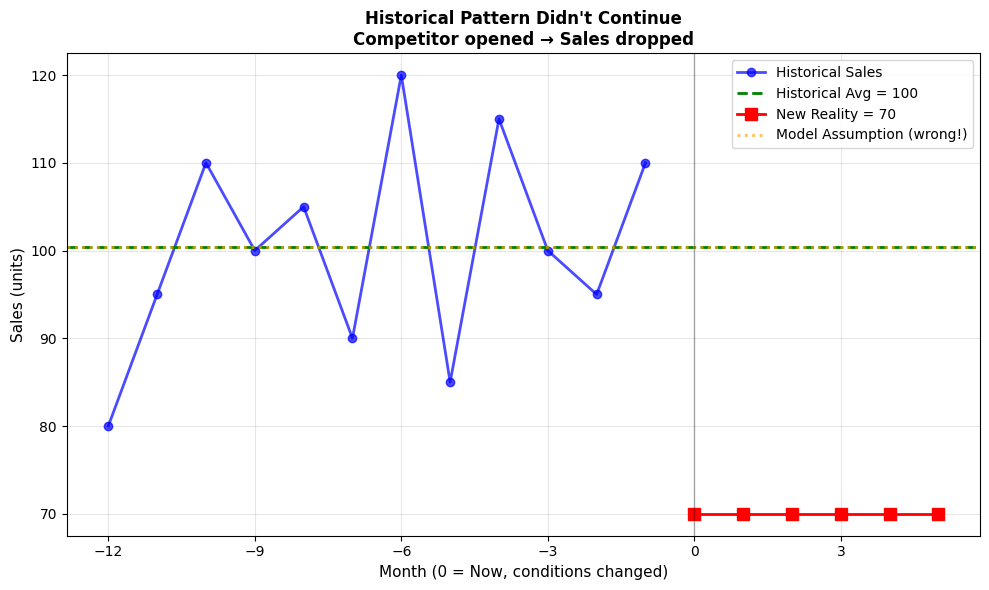



KEY INSIGHT:
  - Historical patterns don't always continue
  - Market conditions, competition, technology all change
  - Models using historical averages fail when conditions change
  - Always ask: Will this pattern continue?


In [6]:
# Scenario: Market conditions changed
# Historical average was 100 units/month
# But a competitor opened nearby, reducing sales to 70 units/month

historical_avg = average_sales
new_reality = 70  # Sales dropped due to competition

print("SCENARIO: Market Conditions Changed")
print(f"  Historical average: {historical_avg:.0f} units/month")
print(f"  New reality (competitor opened): {new_reality:.0f} units/month")
print(f"  Change: {((new_reality - historical_avg) / historical_avg * 100):.0f}% decrease")

# Model still uses historical average
model_order = historical_avg * safety_stock_months
actual_need = new_reality * safety_stock_months

overstock = model_order - actual_need
overstock_cost = overstock * 10  # Assume $10 per unit holding cost

print(f"\nMODEL RECOMMENDATION (using historical average):")
print(f"  Order: {model_order:.0f} units")
print(f"\nACTUAL NEED (new reality):")
print(f"  Need: {actual_need:.0f} units")
print(f"\nPROBLEM:")
print(f"  Overstock: {overstock:.0f} units")
print(f"  Estimated holding cost: ${overstock_cost:,.0f}")

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))

months_historical = list(range(-12, 0))
months_future = list(range(0, 6))

# Historical data
ax.plot(months_historical, historical_sales, 'o-', color='blue', 
        linewidth=2, markersize=6, label='Historical Sales', alpha=0.7)

# Historical average
ax.axhline(y=historical_avg, color='green', linestyle='--', 
           linewidth=2, label=f'Historical Avg = {historical_avg:.0f}')

# Future reality (changed)
future_sales_changed = [new_reality] * 6
ax.plot(months_future, future_sales_changed, 's-', color='red', 
        linewidth=2, markersize=8, label=f'New Reality = {new_reality:.0f}')

# Model assumption
ax.axhline(y=historical_avg, color='orange', linestyle=':', 
           linewidth=2, alpha=0.7, label='Model Assumption (wrong!)')

ax.axvline(x=0, color='black', linestyle='-', linewidth=1, alpha=0.3)

ax.set_xlabel('Month (0 = Now, conditions changed)', fontsize=11)
ax.set_ylabel('Sales (units)', fontsize=11)
ax.set_title('Historical Pattern Didn\'t Continue\nCompetitor opened → Sales dropped', 
             fontsize=12, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)
ax.set_xticks(range(-12, 6, 3))

plt.tight_layout()
plt.show()

print("\n\nKEY INSIGHT:")
print("  - Historical patterns don't always continue")
print("  - Market conditions, competition, technology all change")
print("  - Models using historical averages fail when conditions change")
print("  - Always ask: Will this pattern continue?")


## Summary: Historical Data vs Reality

**Key Takeaways:**

1. **Historical averages describe the past, not predict the future**
   - Averages summarize past data
   - They don't guarantee future performance
   - Patterns that existed may not continue

2. **Averages hide variation**
   - An average of 100 doesn't mean every period has 100
   - Reality has variation around the average
   - Models using averages assume reality matches the average

3. **When reality doesn't match the average, models fail**
   - Higher than average → Stockouts
   - Lower than average → Overstock
   - Variable → Both problems

4. **Historical patterns may not continue**
   - Market conditions change
   - Competition evolves
   - Technology advances
   - Operations improve

5. **Practical implications**
   - Use historical data as a starting point, not a guarantee
   - Consider whether patterns will continue
   - Account for variation, not just averages
   - Test what happens if conditions change

**Remember**: Historical data is useful but not a guarantee. Always consider whether patterns will continue and account for variation!
